# Temperature Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
filePath = "./Data/cleaned_weather_data.csv"
weather_data = pd.read_csv(filePath)
hourly_data = pd.DataFrame(weather_data)

In [3]:
# create a new column with the change in temperature over the next hour.
hourly_data['Temperature Change (°C)'] = hourly_data['Temperature (°C)'].shift(-1) - hourly_data['Temperature (°C)']


In [4]:
# create a new column with the target temperature for the next day.
hourly_data['Target Temperature (°C)'] = hourly_data['Temperature (°C)'].shift(-24)

In [5]:
#Drop rows with NaN values created by shifting
hourly_data = hourly_data.dropna()

In [6]:
hourly_data.head()

,Datetime,Temperature (°C),Atmospheric Pressure (kPa),Precipitation mm/h,Solar Radiation (W/m2),Vapor Pressure (kPa),Humidity (%),Wind Direction (°),Wind Speed (m/s),Hour,Day,Month,Temperature Change (°C),Target Temperature (°C)
0,2020-07-31 14:00:00+00:00,10.350000,101.491667,0.0,0.0,1.056667,84.183333,212.200000,0.331667,14,31,7,0.433333,12.783333
1,2020-07-31 15:00:00+00:00,10.783333,101.481667,0.0,0.0,1.095000,84.883333,257.433333,1.091667,15,31,7,0.150000,12.316667
2,2020-07-31 16:00:00+00:00,10.933333,101.463333,0.0,0.0,1.098333,83.966667,302.316667,1.023333,16,31,7,-0.900000,11.600000
3,2020-07-31 17:00:00+00:00,10.033333,101.405000,0.0,0.0,1.076667,87.300000,269.500000,0.380000,17,31,7,0.133333,11.400000
4,2020-07-31 18:00:00+00:00,10.166667,101.378333,0.0,0.0,1.083333,87.133333,240.900000,0.515000,18,31,7,0.550000,11.000000


In [7]:
# connvert the datetime column to datetime format
hourly_data['Datetime'] = pd.to_datetime(hourly_data['Datetime'])

In [8]:
# correlation between temperature and other variables
correlation = hourly_data.corr()
print(correlation)

                            Datetime  Temperature (°C)  \
Datetime                    1.000000          0.343390   
Temperature (°C)            0.343390          1.000000   
Atmospheric Pressure (kPa) -0.078338         -0.348259   
Precipitation mm/h          0.009284         -0.034201   
Solar Radiation (W/m2)     -0.019742          0.425150   
Vapor Pressure (kPa)        0.481900          0.597587   
Humidity (%)                0.254902         -0.233359   
Wind Direction (°)         -0.114621         -0.248288   
Wind Speed (m/s)           -0.219840          0.134983   
Hour                       -0.000242         -0.336159   
Day                         0.036524         -0.005742   
Month                      -0.634894         -0.172044   
Temperature Change (°C)    -0.003352         -0.099809   
Target Temperature (°C)     0.337453          0.732873   

                            Atmospheric Pressure (kPa)  Precipitation mm/h  \
Datetime                                     -0.078

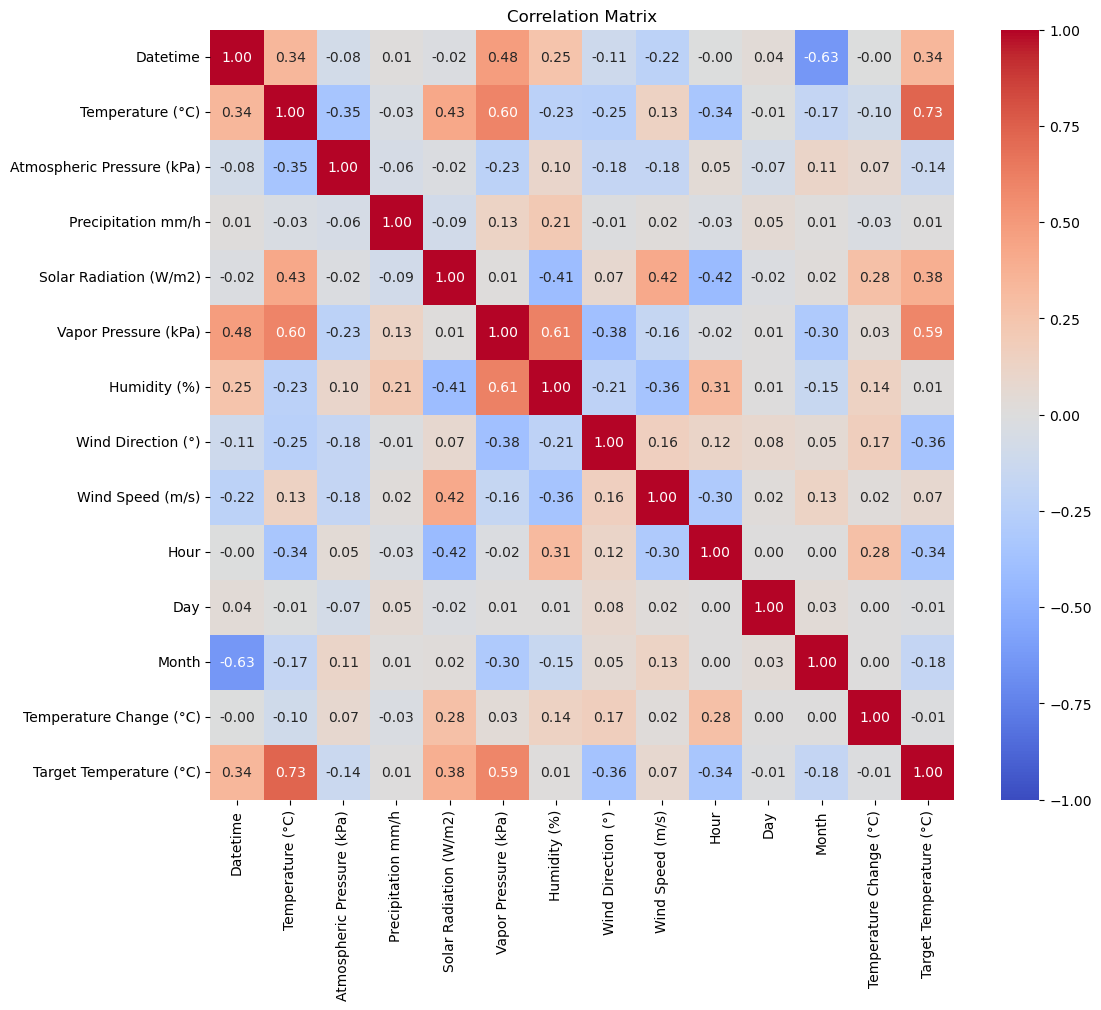

In [9]:
correlation_matrix = hourly_data.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

Temperature changes show that the most important factors to get temperature of the next hour are solar radiation and hour of the day.

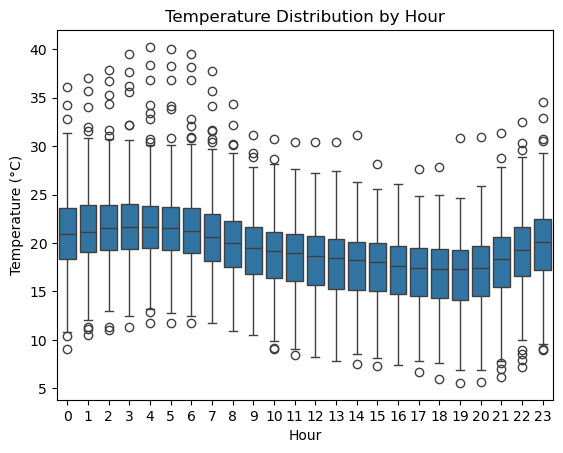

In [10]:
sns.boxplot(x='Hour', y='Temperature (°C)', data=hourly_data)
plt.title('Temperature Distribution by Hour')
plt.show()


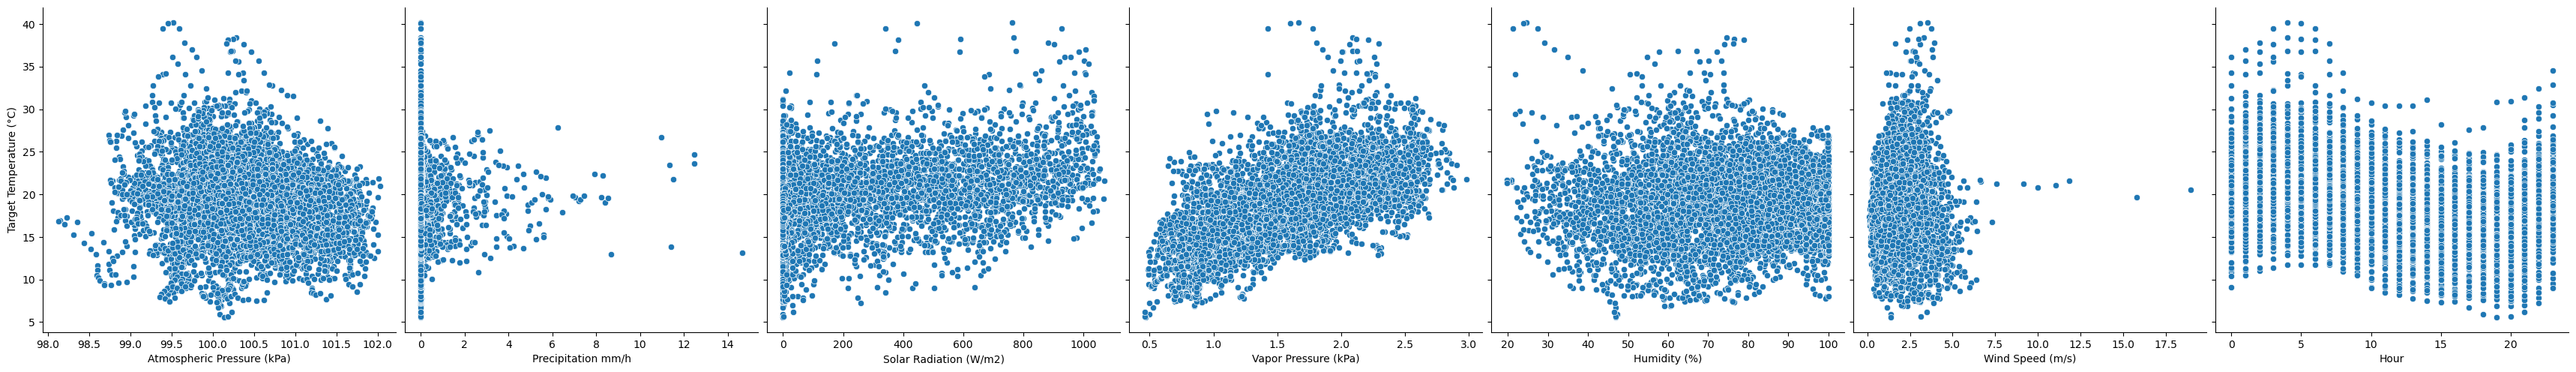

In [11]:
sns.pairplot(hourly_data, x_vars=['Atmospheric Pressure (kPa)', 'Precipitation mm/h', 'Solar Radiation (W/m2)', 'Vapor Pressure (kPa)', 'Humidity (%)', 'Wind Speed (m/s)', 'Hour'], y_vars='Target Temperature (°C)', height=5, aspect=1, kind='scatter')
plt.show()


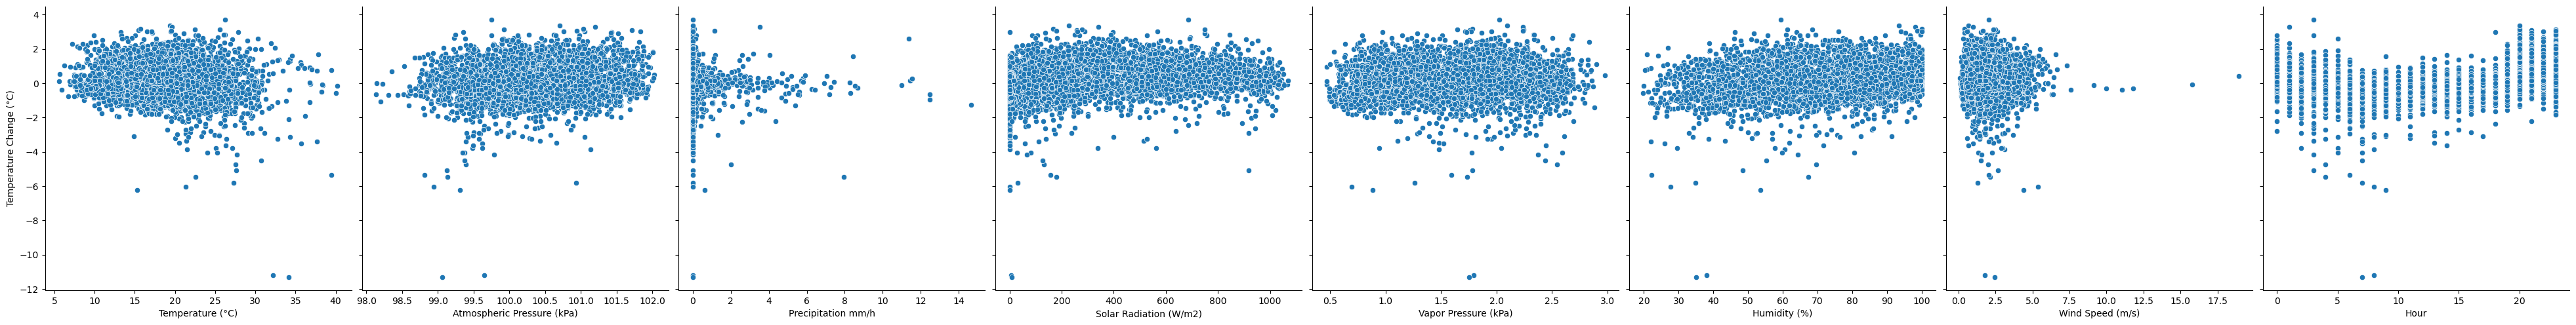

In [12]:
sns.pairplot(hourly_data, x_vars=['Temperature (°C)','Atmospheric Pressure (kPa)', 'Precipitation mm/h', 'Solar Radiation (W/m2)', 'Vapor Pressure (kPa)', 'Humidity (%)', 'Wind Speed (m/s)', 'Hour'], y_vars='Temperature Change (°C)', height=5, aspect=1, kind='scatter')
plt.show()


In [13]:
# Feature Importance using Random Forest
from sklearn.ensemble import RandomForestRegressor


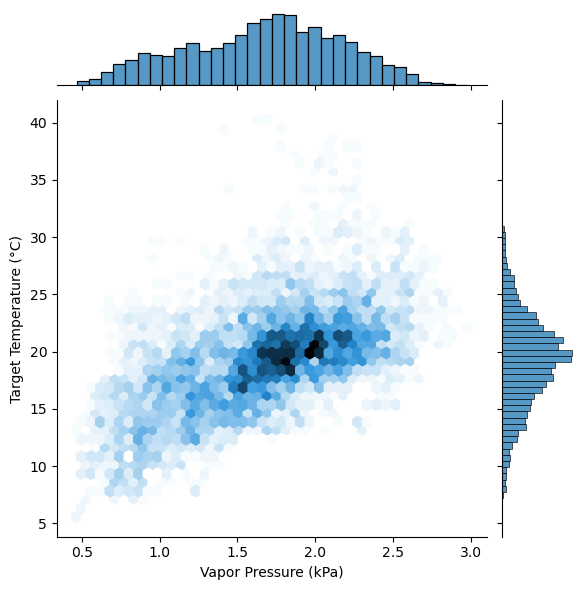

In [14]:
sns.jointplot(x='Vapor Pressure (kPa)', y='Target Temperature (°C)', data=hourly_data, kind='hex')
plt.show()


***Feature importance based on mean decrease in impurity***

In [15]:
# X is the feature matrix
X = hourly_data.drop(columns=['Target Temperature (°C)', 'Temperature Change (°C)', 'Datetime', 'Temperature (°C)']) # i'll be testing which way is to be used
# y is the target vector (the 'Target Temperature' column)
y = hourly_data['Target Temperature (°C)']

In [16]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
from sklearn.ensemble import RandomForestRegressor

feature_names = X.columns
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

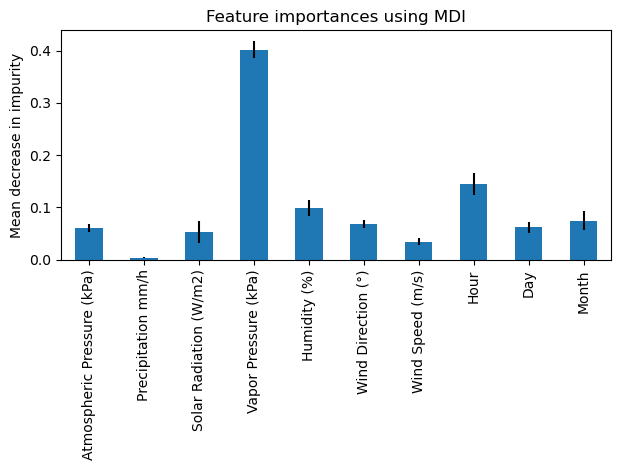

In [18]:
# Feature importance based on mean decrease in impurity
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

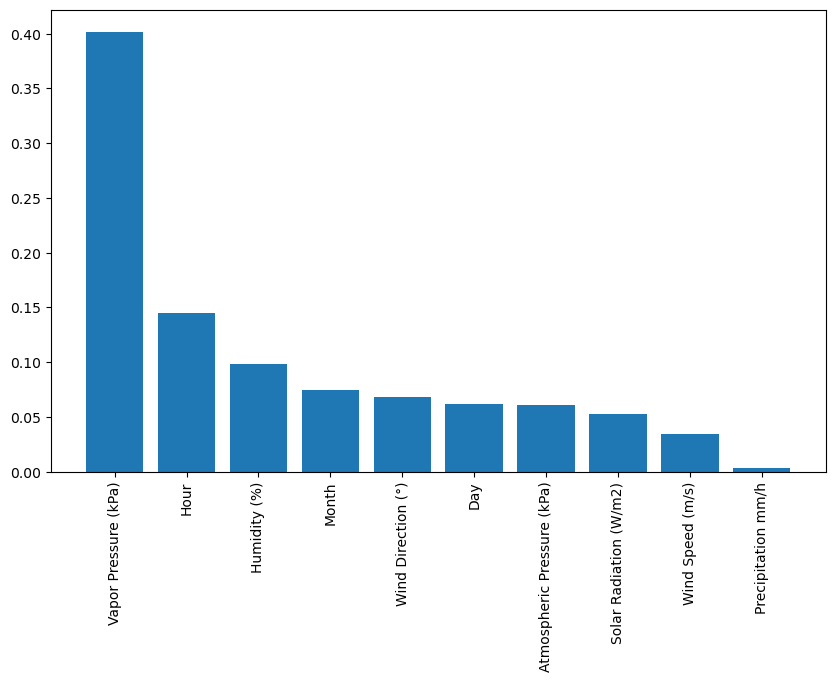

In [19]:
# Get feature importances
importances = forest.feature_importances_
feature_names = X_train.columns
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.show()

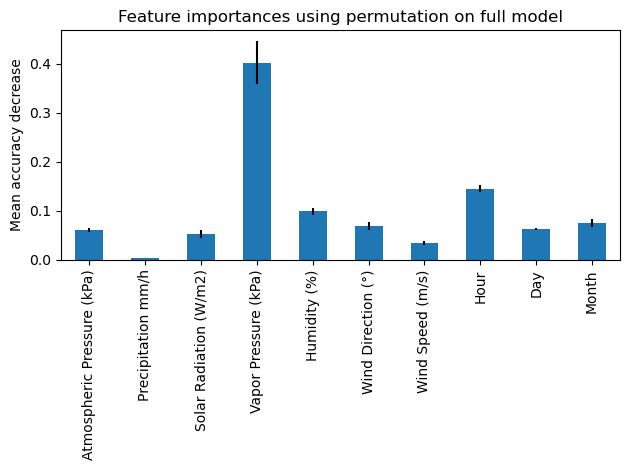

In [20]:
from sklearn.inspection import permutation_importance
result = permutation_importance(
    forest, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [21]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Initialize RFE with the model and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=5)

# Fit RFE
rfe.fit(X_train, y_train)

# Print the selected features
print(f'Selected Features: {X_train.columns[rfe.support_]}')


Selected Features: Index(['Atmospheric Pressure (kPa)', 'Vapor Pressure (kPa)', 'Humidity (%)',
       'Wind Speed (m/s)', 'Hour'],
      dtype='object')


The above plots show the most important features by using two different methods. 

Rfe predicted ['Atmospheric Pressure (kPa)', 'Vapor Pressure (kPa)', 'Humidity (%)',
       'Wind Speed (m/s)', 'Hour'] as main features. while random forest predicted low effect of rain and wind speed

***Model using Random forest predicted attribures***

the following model is the final model

In [22]:
# Use only the selected features for training
selected_features = [ 'Atmospheric Pressure (kPa)', 'Vapor Pressure (kPa)', 'Humidity (%)', 'Day', 'Hour', 'Wind Direction (°)', 'Month', 'Solar Radiation (W/m2)']

X_train_forest_selected = X_train[selected_features]
X_test_forest_selected = X_test[selected_features]

# Training model using the selected features
model = RandomForestRegressor()
model.fit(X_train_forest_selected, y_train)

# Predict and evaluate
y_temp_pred = model.predict(X_test_forest_selected)

# evaluation

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_temp_pred)
r2 = r2_score(y_test, y_temp_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


RMSE: 1.7070995052481515
Mean Squared Error: 2.9141887208184833
R² Score: 0.8467452040838783


In [23]:
# saving the model
import joblib
joblib.dump(model, './models/temperature_model.pkl')
print("Model saved to temperature_model.pkl")

Model saved to temperature_model.pkl


**Model using RFE predicted attribures**

In [24]:
# Use only the selected features for training
selected_features = ['Atmospheric Pressure (kPa)', 'Vapor Pressure (kPa)', 'Humidity (%)', 'Wind Speed (m/s)', 'Hour']

X_train_rfe_selected = X_train[selected_features]
X_test_rfe_selected = X_test[selected_features]

# Train your model (e.g., Random Forest)
model = RandomForestRegressor()
model.fit(X_train_rfe_selected, y_train)

# Predict and evaluate
y_rfe_pred = model.predict(X_test_rfe_selected)


# Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_rfe_pred)
r2 = r2_score(y_test, y_rfe_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


RMSE: 2.1794161509180707
Mean Squared Error: 4.749854758882539
R² Score: 0.7502090319328003


It seems like adding more is increasing the accuracy we'll try adding all the attributes

In [25]:
# Train your model (e.g., Random Forest)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)


# Evaluation

from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


RMSE: 1.7445837504864776
Mean Squared Error: 3.0435724624614644
R² Score: 0.8399410191734411


Visualisations of prediction of Random forest model

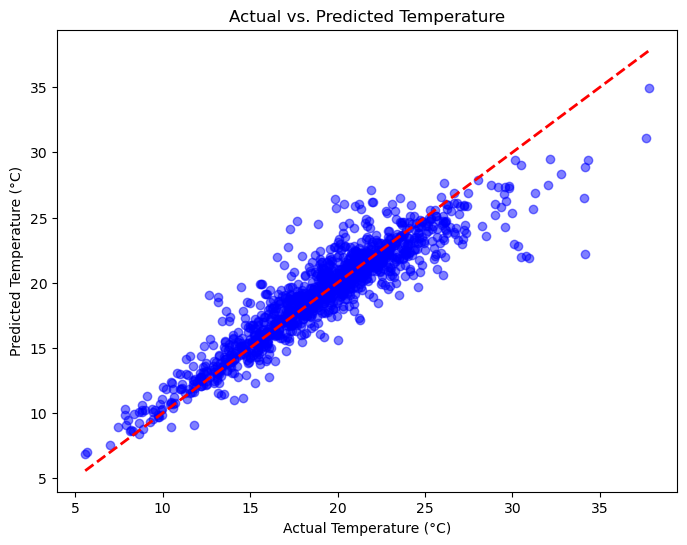

In [26]:

# Scatter plot of actual vs. predicted temperatures
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_temp_pred, alpha=0.5, color='b')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Temperature (°C)')
plt.ylabel('Predicted Temperature (°C)')
plt.title('Actual vs. Predicted Temperature')
plt.show()


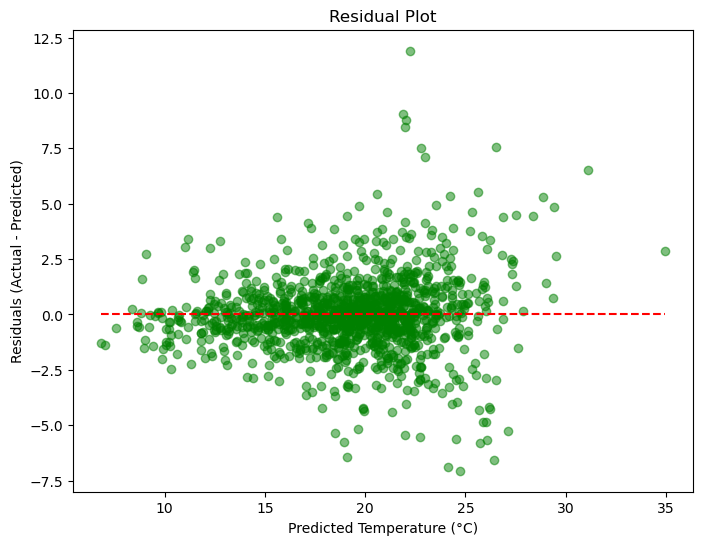

In [27]:
residuals = y_test - y_temp_pred

# Residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y_temp_pred, residuals, alpha=0.5, color='g')
plt.hlines(0, xmin=y_temp_pred.min(), xmax=y_temp_pred.max(), colors='r', linestyles='dashed')
plt.xlabel('Predicted Temperature (°C)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()


Maybe a different model?

# Testing other models

Linear regression

In [28]:
# Use only the selected features for training
selected_features = ['Atmospheric Pressure (kPa)', 'Vapor Pressure (kPa)', 'Humidity (%)', 'Wind Speed (m/s)', 'Month', 'Solar Radiation (W/m2)', 'Hour']

X_train_hour_selected = X_train[selected_features]
X_test_hour_selected = X_test[selected_features]

# Train your model (e.g., Random Forest)
model = LinearRegression()
model.fit(X_train_hour_selected, y_train)

# Predict and evaluate
y_lin_pred = model.predict(X_test_hour_selected)


# Evaluate the model
mse = mean_squared_error(y_test, y_lin_pred)
r2 = r2_score(y_test, y_lin_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


RMSE: 2.7692624671329797
Mean Squared Error: 7.668814611871438
R² Score: 0.5967033260869812


Ridge Regression

In [29]:
# import ridge regression
from sklearn.linear_model import Ridge

selected_features = ['Atmospheric Pressure (kPa)', 'Vapor Pressure (kPa)', 'Humidity (%)', 'Wind Speed (m/s)', 'Month', 'Solar Radiation (W/m2)', 'Hour']

X_train_hour_selected = X_train[selected_features]
X_test_hour_selected = X_test[selected_features]

# Train your model (e.g., Random Forest)
model = Ridge()
model.fit(X_train_hour_selected, y_train)

# Predict and evaluate
y_ridge_pred = model.predict(X_test_hour_selected)



# Evaluate the model
mse = mean_squared_error(y_test, y_ridge_pred)
r2 = r2_score(y_test, y_ridge_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

RMSE: 2.769079744805012
Mean Squared Error: 7.667802633089391
R² Score: 0.5967565452215575


RandomForestRegressor performs the best

# Humidity model

In [30]:
# create a new column with the target Humidity for the next day.
hourly_data['Target Humidity'] = hourly_data['Humidity (%)'].shift(-24)
#Drop rows with NaN values created by shifting
X_humidity_data = hourly_data.dropna()

In [31]:
# X is the feature matrix (all columns except 'Target Temperature')
X_humidity = X_humidity_data.drop(columns=['Target Temperature (°C)', 'Temperature Change (°C)', 'Datetime', 'Target Humidity']) # i'll be testing which way is to be used
# y is the target vector (the 'Target humidity' column)
y_humidity = X_humidity_data['Target Humidity']

In [32]:
X_humidity.head()

,Temperature (°C),Atmospheric Pressure (kPa),Precipitation mm/h,Solar Radiation (W/m2),Vapor Pressure (kPa),Humidity (%),Wind Direction (°),Wind Speed (m/s),Hour,Day,Month
0,10.350000,101.491667,0.0,0.0,1.056667,84.183333,212.200000,0.331667,14,31,7
1,10.783333,101.481667,0.0,0.0,1.095000,84.883333,257.433333,1.091667,15,31,7
2,10.933333,101.463333,0.0,0.0,1.098333,83.966667,302.316667,1.023333,16,31,7
3,10.033333,101.405000,0.0,0.0,1.076667,87.300000,269.500000,0.380000,17,31,7
4,10.166667,101.378333,0.0,0.0,1.083333,87.133333,240.900000,0.515000,18,31,7


In [33]:
X_train_hum, X_test_hum, y_train_hum, y_test_hum = train_test_split(X_humidity, y_humidity, test_size=0.2, random_state=42)

In [34]:

feature_names = X_humidity.columns
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train_hum, y_train_hum)

RandomForestRegressor(random_state=0)

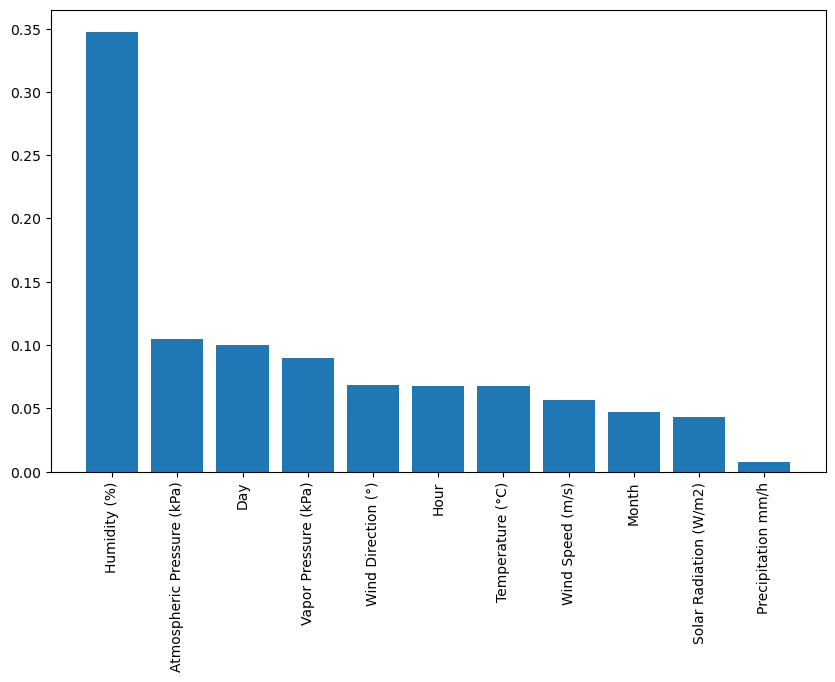

In [35]:
# Get feature importances
importances = forest.feature_importances_
feature_names = X_train_hum.columns
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.show()

In [36]:
# Initialize the model
model = RandomForestRegressor()

# Initialize RFE with the model and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=8)

# Fit RFE
rfe.fit(X_train_hum, y_train_hum)

# Print the selected features
print(f'Selected Features: {X_train_hum.columns[rfe.support_]}')

Selected Features: Index(['Temperature (°C)', 'Atmospheric Pressure (kPa)',
       'Vapor Pressure (kPa)', 'Humidity (%)', 'Wind Direction (°)',
       'Wind Speed (m/s)', 'Hour', 'Day'],
      dtype='object')


**Humidity Model Training**

In [37]:
feature_dropped = ['Precipitation mm/h', 'Wind Direction (°)', 'Solar Radiation (W/m2)', 'Humidity (%)']
X_train_forest_selected = X_train_hum.drop(columns=feature_dropped)
X_test_forest_selected = X_test_hum.drop(columns=feature_dropped)

# Train your model (e.g., Random Forest)
model = RandomForestRegressor()
model.fit(X_train_forest_selected, y_train_hum)

# Predict and evaluate
y_humidity_pred = model.predict(X_test_forest_selected)

# evaluation

# Evaluate the model
mse = mean_squared_error(y_test_hum, y_humidity_pred)
r2 = r2_score(y_test_hum, y_humidity_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


RMSE: 8.317597169452284
Mean Squared Error: 69.18242267328066
R² Score: 0.7789298593461338


In [38]:
X_test_forest_selected.columns

Index(['Temperature (°C)', 'Atmospheric Pressure (kPa)',
       'Vapor Pressure (kPa)', 'Wind Speed (m/s)', 'Hour', 'Day', 'Month'],
      dtype='object')

In [39]:
# saving the model
joblib.dump(model, './models/humidity_model.pkl')
print("Model saved to humidity_model.pkl")

Model saved to humidity_model.pkl


trying linear regression

In [40]:
selected_features = ['Temperature (°C)', 'Atmospheric Pressure (kPa)',
       'Vapor Pressure (kPa)', 'Humidity (%)', 'Wind Direction (°)',
       'Wind Speed (m/s)', 'Hour', 'Day']
X_train_forest_selected = X_train_hum[selected_features]
X_test_forest_selected = X_test_hum[selected_features]

# Train your model (e.g., Random Forest)
model = LinearRegression()
model.fit(X_train_forest_selected, y_train_hum)

# Predict and evaluate
y_lin_pred = model.predict(X_test_forest_selected)

# evaluation

# Evaluate the model
mse = mean_squared_error(y_test_hum, y_lin_pred)
r2 = r2_score(y_test_hum, y_lin_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

RMSE: 14.206313674251
Mean Squared Error: 201.81934821121092
R² Score: 0.35509295610493996


plot of prediction by randon forest

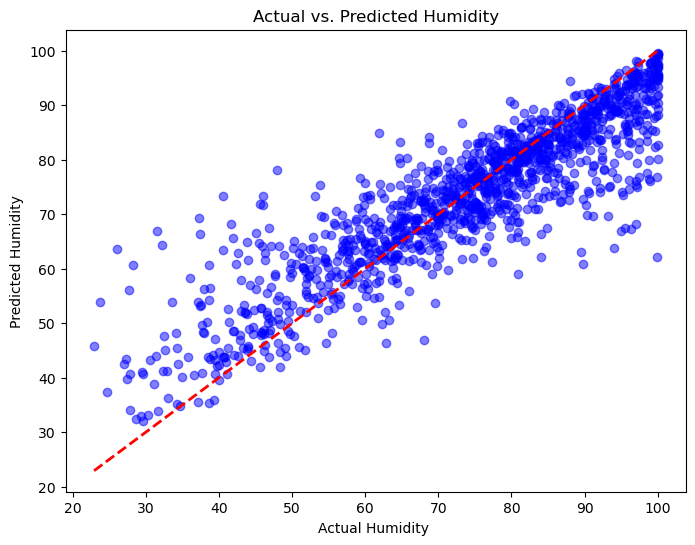

In [41]:
# Scatter plot of actual vs. predicted Humidity
plt.figure(figsize=(8, 6))
plt.scatter(y_test_hum, y_humidity_pred, alpha=0.5, color='b')
plt.plot([y_test_hum.min(), y_test_hum.max()], [y_test_hum.min(), y_test_hum.max()], 'r--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Humidity ')
plt.ylabel('Predicted Humidity')
plt.title('Actual vs. Predicted Humidity')
plt.show()

# Wind Speed Model

In [42]:
# create a new column with the target Wind speed for the next day.
hourly_data['Target Wind Speed'] = hourly_data['Wind Speed (m/s)'].shift(-24)
#Drop rows with NaN values created by shifting
X_win_data = hourly_data.dropna()

In [43]:
#cleaning outliers

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = X_win_data['Wind Speed (m/s)'].quantile(0.25)
Q3 = X_win_data['Wind Speed (m/s)'].quantile(0.75)

# Compute IQR
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = X_win_data[(X_win_data['Wind Speed (m/s)'] >= lower_bound) & (X_win_data['Wind Speed (m/s)'] <= upper_bound)]

print("Original Data:")
X_win_data.describe()

Original Data:


,Temperature (°C),Atmospheric Pressure (kPa),Precipitation mm/h,Solar Radiation (W/m2),Vapor Pressure (kPa),Humidity (%),Wind Direction (°),Wind Speed (m/s),Hour,Day,Month,Temperature Change (°C),Target Temperature (°C),Target Humidity,Target Wind Speed
count,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000,6546.000000
mean,19.193132,100.415929,0.125544,205.336697,1.665533,74.024971,178.446752,1.912333,11.510999,15.454934,6.736786,0.001127,19.214779,74.096644,1.912129
std,4.352393,0.662458,0.710449,290.830489,0.498541,17.857648,86.726251,1.080843,6.924538,8.926893,3.918019,0.864237,4.339030,17.882854,1.080822
min,5.566667,98.133333,0.000000,0.000000,0.465000,19.820000,1.283333,0.120000,0.000000,1.000000,1.000000,-11.306667,5.566667,19.820000,0.120000
25%,16.533333,99.955000,0.000000,0.000000,1.293333,62.520833,113.354167,1.118750,6.000000,8.000000,3.000000,-0.433333,16.566667,62.600000,1.118750
50%,19.383333,100.393333,0.000000,16.416667,1.708333,76.416667,169.891667,1.758333,12.000000,15.000000,8.000000,-0.100000,19.400000,76.500000,1.758333
75%,21.716667,100.908333,0.000000,364.500000,2.031667,88.216667,242.275000,2.542917,18.000000,23.000000,10.000000,0.366667,21.729167,88.333333,2.542917
max,40.225000,102.028333,14.654000,1069.666667,2.978333,100.000000,357.960000,18.933333,23.000000,31.000000,12.000000,3.716667,40.225000,100.000000,18.933333


In [44]:

print("\nCleaned Data:")
df_cleaned.describe()


Cleaned Data:


,Temperature (°C),Atmospheric Pressure (kPa),Precipitation mm/h,Solar Radiation (W/m2),Vapor Pressure (kPa),Humidity (%),Wind Direction (°),Wind Speed (m/s),Hour,Day,Month,Temperature Change (°C),Target Temperature (°C),Target Humidity,Target Wind Speed
count,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000,6454.000000
mean,19.216359,100.427597,0.127318,203.032097,1.673744,74.285716,176.900853,1.857377,11.539046,15.416331,6.713356,-0.003409,19.260433,74.340982,1.895134
std,4.301370,0.654672,0.715338,290.099402,0.494261,17.638821,85.918556,0.951182,6.896387,8.947341,3.931415,0.860611,4.322483,17.774967,1.069264
min,5.566667,98.311667,0.000000,0.000000,0.465000,19.820000,2.150000,0.120000,0.000000,1.000000,1.000000,-11.306667,5.566667,19.820000,0.120000
25%,16.587500,99.970000,0.000000,0.000000,1.308333,62.883333,113.108333,1.108333,6.000000,8.000000,3.000000,-0.433333,16.616667,62.950000,1.111667
50%,19.400000,100.400000,0.000000,14.500000,1.713333,76.681667,169.250000,1.743333,12.000000,15.000000,8.000000,-0.100000,19.433333,76.816667,1.746667
75%,21.745833,100.917667,0.000000,356.958333,2.036667,88.312500,240.029167,2.506667,18.000000,23.000000,10.000000,0.350000,21.766667,88.483333,2.523833
max,40.225000,102.028333,14.654000,1069.666667,2.978333,100.000000,357.960000,4.676667,23.000000,31.000000,12.000000,3.716667,40.225000,100.000000,18.933333


In [45]:
X_win_data = df_cleaned

In [46]:
# X is the feature matrix
X_win = X_win_data.drop(columns=['Target Temperature (°C)', 'Temperature Change (°C)', 'Datetime', 'Target Humidity', 'Target Wind Speed']) # i'll be testing which way is to be used
# y is the target vector (the 'Target' column)
y_win = X_win_data['Target Wind Speed']

In [47]:
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(X_win, y_win, test_size=0.2, random_state=42)

In [48]:

feature_names = X_win.columns
forest = RandomForestRegressor(random_state=0)
forest.fit(X_train_win, y_train_win)

RandomForestRegressor(random_state=0)

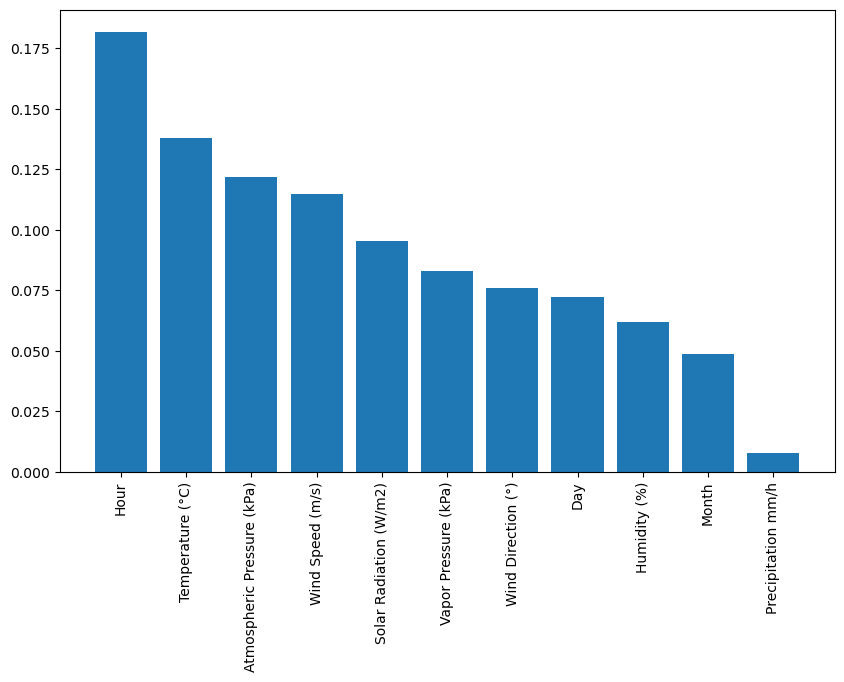

In [49]:
# Get feature importances
importances = forest.feature_importances_
feature_names = X_train_win.columns
sorted_indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices])
plt.xticks(range(len(importances)), feature_names[sorted_indices], rotation=90)
plt.show()

In [50]:
# Initialize the model
model = RandomForestRegressor()

# Initialize RFE with the model and specify the number of features to select
rfe = RFE(estimator=model, n_features_to_select=6)

# Fit RFE
rfe.fit(X_train_win, y_train_win)

# Print the selected features
print(f'Selected Features: {X_train_win.columns[rfe.support_]}')

Selected Features: Index(['Temperature (°C)', 'Atmospheric Pressure (kPa)',
       'Solar Radiation (W/m2)', 'Vapor Pressure (kPa)', 'Wind Speed (m/s)',
       'Hour'],
      dtype='object')


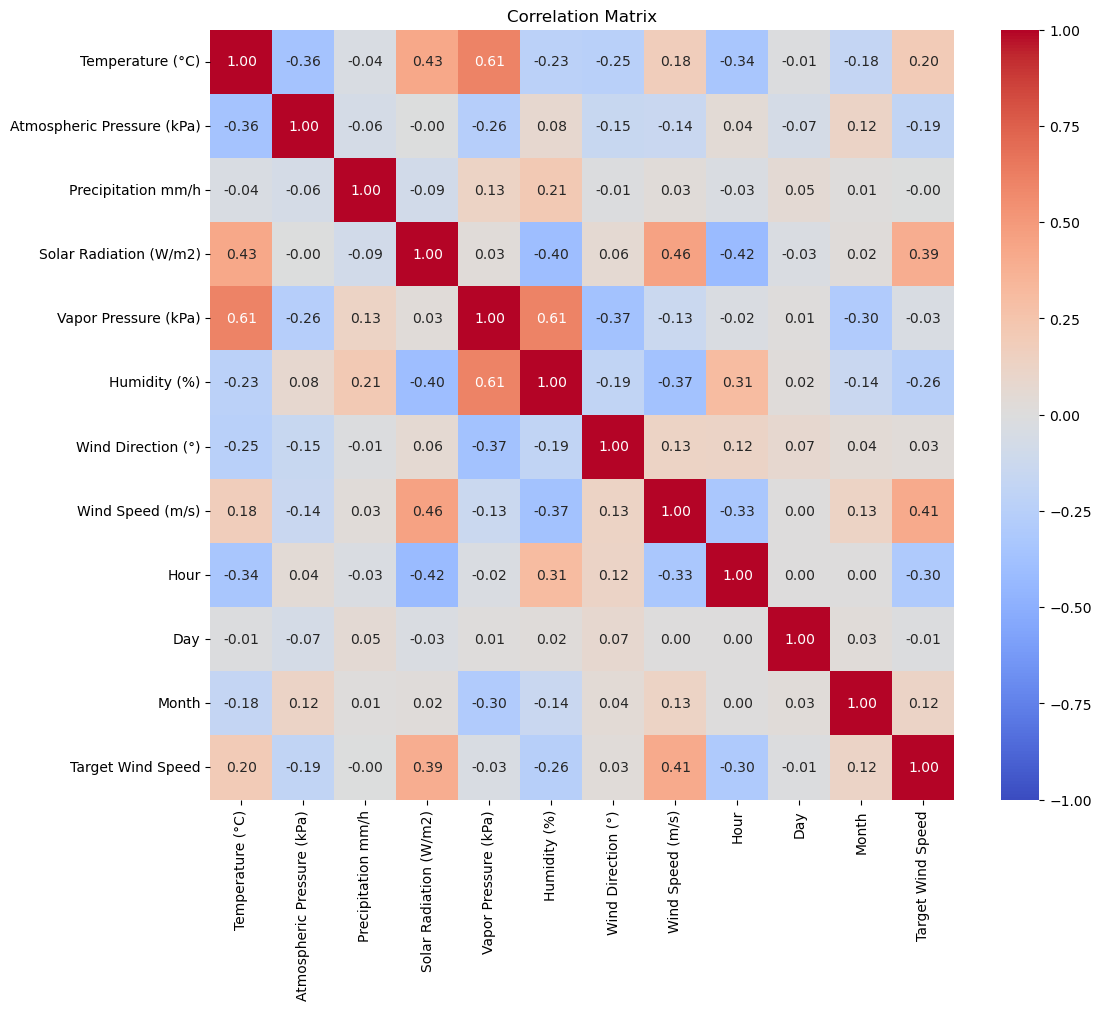

In [51]:
correlation_matrix = X_win_data.drop(columns=['Target Temperature (°C)', 'Temperature Change (°C)', 'Datetime', 'Target Humidity']).corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [52]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestRegressor

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'max_features': ['sqrt', 'log2', None]
# }


# # Initialize the model
# rf = RandomForestRegressor()

# # Set up the grid search
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search.fit(X_train_win, y_train_win)

# # Best parameters
# print("Best parameters found:", grid_search.best_params_)


In [53]:
feature_dropped = ['Precipitation mm/h']
X_train_forest_selected = X_train_win.drop(columns=feature_dropped)
X_test_forest_selected = X_test_win.drop(columns=feature_dropped)

# Train your model (e.g., Random Forest)
model = RandomForestRegressor()
model.fit(X_train_forest_selected, y_train_win)

# Predict and evaluate
y_forest_pred = model.predict(X_test_forest_selected)

# evaluation

# Evaluate the model
mse = mean_squared_error(y_test_win, y_forest_pred)
r2 = r2_score(y_test_win, y_forest_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


RMSE: 0.6265212141939474
Mean Squared Error: 0.3925288318350581
R² Score: 0.6297308158770578


In [54]:
from xgboost import XGBRegressor

feature_dropped = ['Precipitation mm/h']
X_train_selected = X_train_win.drop(columns=feature_dropped)
X_test_selected = X_test_win.drop(columns=feature_dropped)

# Train your model (e.g., Random Forest)

xgb = XGBRegressor()
xgb.fit(X_train_forest_selected, y_train_win)
y_pred_XGB = xgb.predict(X_test_selected)


# evaluation

# Evaluate the model
mse = mean_squared_error(y_test_win, y_pred_XGB)
r2 = r2_score(y_test_win, y_pred_XGB)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


RMSE: 0.6246863085036547
Mean Squared Error: 0.3902329840319233
R² Score: 0.6318964700252208


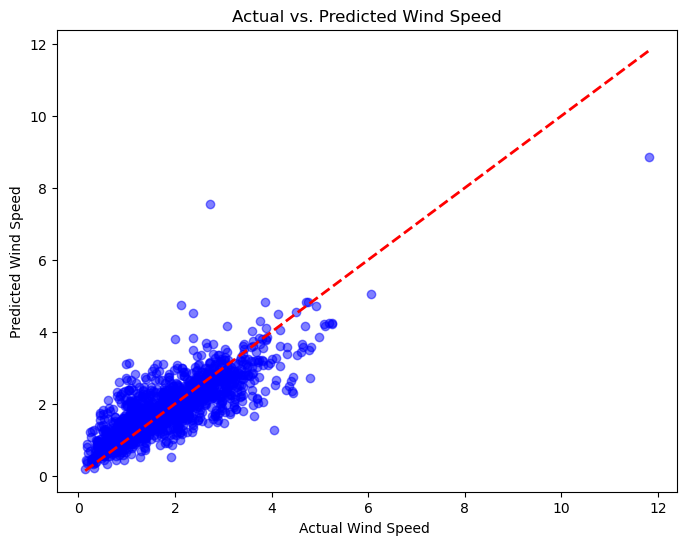

In [55]:
# Scatter plot of actual vs. predicted speed
plt.figure(figsize=(8, 6))
plt.scatter(y_test_win, y_pred_XGB, alpha=0.5, color='b')
plt.plot([y_test_win.min(), y_test_win.max()], [y_test_win.min(), y_test_win.max()], 'r--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Wind Speed ')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs. Predicted Wind Speed')
plt.show()

In [56]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_win.drop(columns=['Precipitation mm/h']))
X_test_poly = poly.transform(X_test_win.drop(columns=['Precipitation mm/h']))

# Train your model

xgb = XGBRegressor()
xgb.fit(X_train_poly, y_train_win)
y_pred_XGB = xgb.predict(X_test_poly)


# evaluation

# Evaluate the model
mse = mean_squared_error(y_test_win, y_pred_XGB)
r2 = r2_score(y_test_win, y_pred_XGB)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

RMSE: 0.5673978242388793
Mean Squared Error: 0.3219402909510141
R² Score: 0.6963163997165314


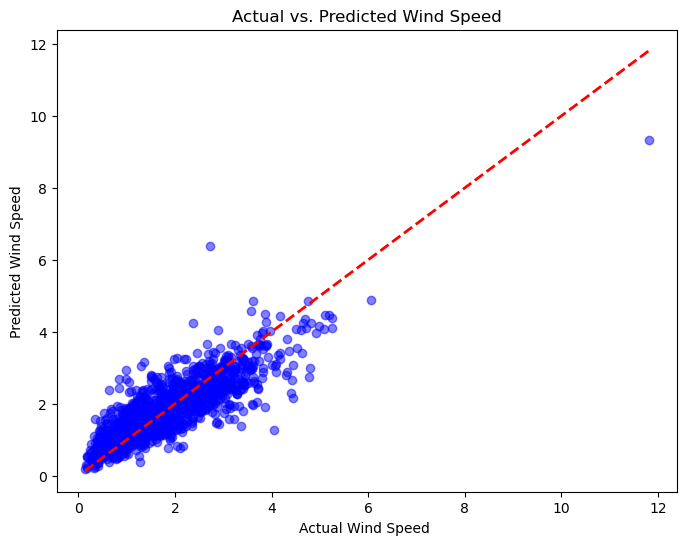

In [57]:
# Scatter plot of actual vs. predicted speed
plt.figure(figsize=(8, 6))
plt.scatter(y_test_win, y_pred_XGB, alpha=0.5, color='b')
plt.plot([y_test_win.min(), y_test_win.max()], [y_test_win.min(), y_test_win.max()], 'r--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Wind Speed ')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs. Predicted Wind Speed')
plt.show()

Trying k-fold

In [58]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, make_scorer
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [59]:

poly = PolynomialFeatures(degree=2)
X_win_poly = poly.fit_transform(X_win.drop(columns=['Precipitation mm/h']))
X_test_poly = poly.transform(X_win.drop(columns=['Precipitation mm/h']))

model = XGBRegressor()

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_win_poly, y_win, cv=kf, scoring='r2')

In [60]:
# Use cross_val_score to evaluate with cross-validation
# Use a custom scorer for MSE
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)

# Perform cross-validation and calculate negative MSE (so we'll multiply by -1)
cv_scores_mse = cross_val_score(model, X_win_poly, y_win, cv=kf, scoring=mse_scorer)

# Calculate average RMSE from the MSE scores
cv_rmse = np.mean(np.sqrt(-cv_scores_mse))
print(f"Cross-validated RMSE: {cv_rmse:.4f}")


Cross-validated RMSE: 0.6231


In [61]:
average_r2 = np.mean(scores)

print(f"R² Score for each fold: {[round(score, 4) for score in scores]}")
print(f"Average R² across {k} folds: {average_r2:.2f}")

R² Score for each fold: [np.float64(0.6963), np.float64(0.6337), np.float64(0.6662), np.float64(0.6182), np.float64(0.685)]
Average R² across 5 folds: 0.66


**Using stacking**

In [62]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_win.drop(columns=['Precipitation mm/h']))
X_test_poly = poly.transform(X_test_win.drop(columns=['Precipitation mm/h']))

# Train your model

estimators = [
    ('xgb', XGBRegressor(n_estimators=200)),
    ('rf', RandomForestRegressor(n_estimators=200))
]
model = StackingRegressor(estimators=estimators, final_estimator=Ridge())

model.fit(X_train_poly, y_train_win)
y_speed_pred = model.predict(X_test_poly)


# evaluation

# Evaluate the model
mse = mean_squared_error(y_test_win, y_speed_pred)
r2 = r2_score(y_test_win, y_speed_pred)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

RMSE: 0.5546038682245348
Mean Squared Error: 0.3075854506496172
R² Score: 0.7098572012463584


In [63]:
X_train_win.columns

Index(['Temperature (°C)', 'Atmospheric Pressure (kPa)', 'Precipitation mm/h',
       'Solar Radiation (W/m2)', 'Vapor Pressure (kPa)', 'Humidity (%)',
       'Wind Direction (°)', 'Wind Speed (m/s)', 'Hour', 'Day', 'Month'],
      dtype='object')

In [64]:
# saving the model
joblib.dump(model, './models/wind_speed_model.pkl')
print("Model saved to wind_speed_model.pkl")

Model saved to wind_speed_model.pkl


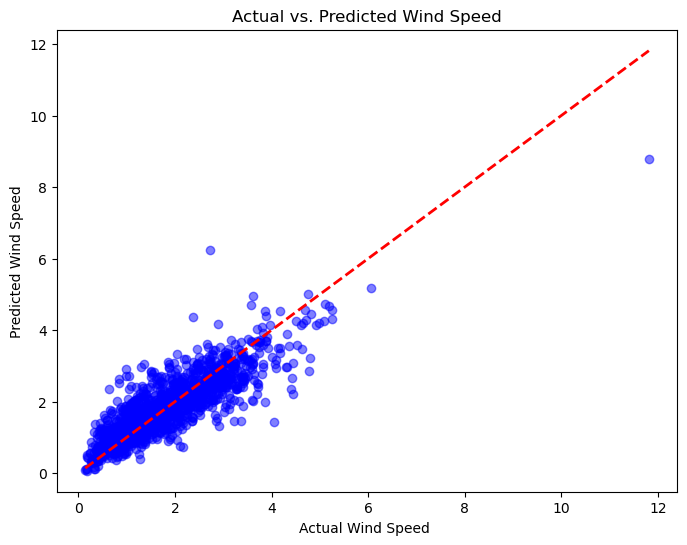

In [65]:
# Scatter plot of actual vs. predicted speed
plt.figure(figsize=(8, 6))
plt.scatter(y_test_win, y_speed_pred, alpha=0.5, color='b')
plt.plot([y_test_win.min(), y_test_win.max()], [y_test_win.min(), y_test_win.max()], 'r--', lw=2)  # Plotting the diagonal line
plt.xlabel('Actual Wind Speed ')
plt.ylabel('Predicted Wind Speed')
plt.title('Actual vs. Predicted Wind Speed')
plt.show()